In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('kc_house_data.csv') # King county house price dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


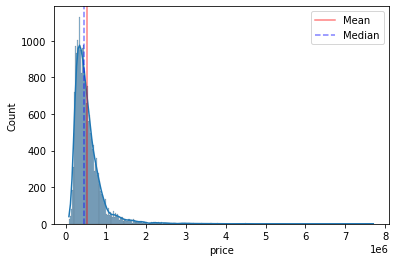

In [ ]:
sns.histplot(data = df['price'], kde = True)
plt.axvline(x=df.price.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=df.price.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()


Data transformation is the process of taking a mathematical function and applying it to the data.

### Log transformation

- Each variable x is replaced with, where the base of the log is left up to the analyst. It is considered common to use base 10, base 2 and the natural log ln.
- The log transformation can be used to make highly skewed distributions less skewed. 
- This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics.

In [ ]:
#create log-transformed data
df['price_log'] = np.log(df['price'])


C:\Users\sandy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_log', ylabel='Density'>

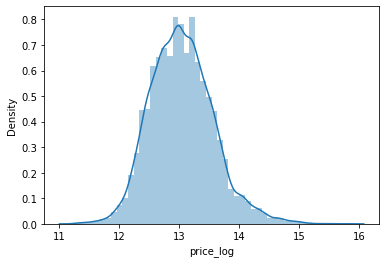

In [ ]:
sns.distplot(df['price_log'])

### Square root transformation

- Normalizing a skewed distribution
- Transforming a non-linear relationship between 2 variables into a linear one
- Reducing heteroscedasticity of the residuals in linear regression
- Focusing on visualizing certain parts of your data
- When you apply a square root transformation to a variable, high values get compressed and low values become more spread out. Log transformation does the same thing but more aggressively.

In [ ]:
# Square root transformation
df['price_sqrt'] = np.sqrt(df['price'])


C:\Users\sandy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_sqrt', ylabel='Density'>

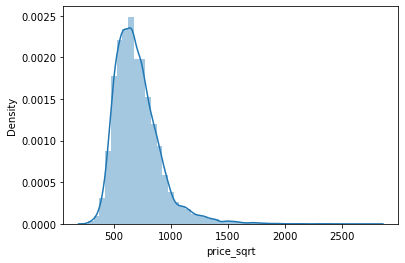

In [ ]:
sns.distplot(df['price_sqrt'])

### Power transformation

- A power transform is a family of functions applied to create a monotonic transformation of data using power functions. 
- It is a data transformation technique used to stabilize variance, make the data more normal distribution-like, improve the validity of measures of association (such as the Pearson correlation between variables), and for other data stabilization procedures.
- Currently has 'Box-cox' and Yeo-Johnson' transforms
- Box-Cox requires the input data to be strictly positive (even no zero values)


In [ ]:
from scipy.stats import boxcox

# Box-Cox Transformation in Python
df.insert(len(df.columns), 'A_Boxcox', 
              boxcox(df.iloc[:, 2])[0])

C:\Users\sandy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='A_Boxcox', ylabel='Density'>

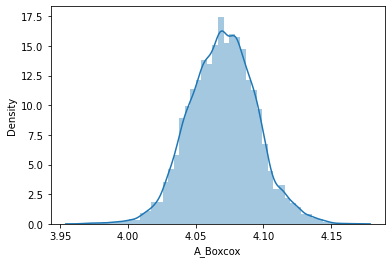

In [ ]:
sns.distplot(df['A_Boxcox'])

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,price_sqrt,A_Boxcox
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,12.309982,471.062629,4.033476
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614,733.484833,4.078343
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,12.100712,424.264069,4.021445
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,777.174369,4.083548
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,13.142166,714.142843,4.075891
